In [140]:
from secml.data.loader import CDataLoaderMNIST
from secml.ml.classifiers import CClassifierSVM
from secml.ml.kernels import CKernelRBF
from secml.adv.attacks.evasion import CFoolboxDeepfoolLinf
from secml.figure import CFigure

# 1️⃣ Cargar el conjunto de datos MNIST
n_tr, n_ts = 1000, 20  # Tamaño del dataset
loader = CDataLoaderMNIST()
tr = loader.load('training', num_samples=n_tr)
ts = loader.load('testing', num_samples=n_ts)

# Normalizar los datos (escalarlos a [0,1])
tr.X /= 255.0
ts.X /= 255.0

# 2️⃣ Crear y entrenar un clasificador SVM con kernel RBF
clf = CClassifierSVM(kernel=CKernelRBF(gamma=10), C=1)
clf.fit(tr.X, tr.Y)
print("Entrenamiento del SVM completado.")

# 3️⃣ Seleccionar una muestra de prueba para el ataque
x_test, y_test = ts[15, :].X, ts[15, :].Y  # quinceaba imagen de prueba

# 4️⃣ Crear el ataque 
steps = 100
attack = CFoolboxDeepfoolLinf(classifier=clf, epsilons=0.7,steps=steps)

# 5️⃣ Aplicar el ataque adversarial
adv_x, _, tres,_ = attack.run(x_test, y_test)  # Retorna la imagen perturbada


print("ataque realizado.")

Entrenamiento del SVM completado.
ataque realizado.


In [114]:
type(y_test)

secml.array.c_array.CArray

In [115]:
print(y_test)

CArray([6])


In [116]:
y_test.shape

(1,)

In [117]:
y_test

CArray(1,)(dense: [6])

In [118]:
adv_x

CArray(1,)(dense: [0])

In [119]:

type(x_test )

secml.array.c_array.CArray

In [120]:
x_test.shape

(1, 784)

In [121]:
type(adv_x)

secml.array.c_array.CArray

In [122]:
adv_x.shape

(1,)

In [123]:
type(tres)

secml.data.c_dataset.CDataset

In [124]:
tres.X.shape

(1, 784)

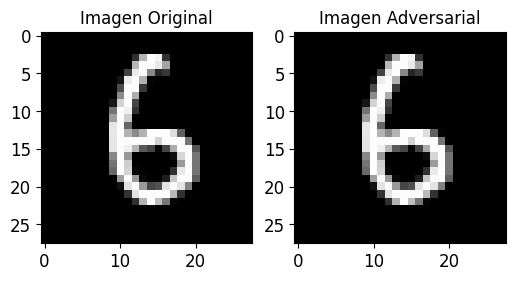

In [132]:
%matplotlib inline
# 6️⃣ Visualizar la imagen original y la adversarial
fig = CFigure()
fig.subplot(1, 2, 1)
fig.sp.imshow(x_test.tondarray().reshape(28, 28), cmap="gray")  # Imagen original
fig.sp.title("Imagen Original")

fig.subplot(1, 2, 2)
fig.sp.imshow(tres.X.reshape((28, 28)), cmap="gray")  # Imagen perturbada
fig.sp.title("Imagen Adversarial")



fig.show()

In [133]:
# Predicción del modelo en la imagen original
y_pred_orig = clf.predict(x_test)

# Predicción del modelo en la imagen adversarial
y_pred_adv = clf.predict(tres.X)

# Mostrar resultados
print(f"Etiqueta original: {y_pred_orig.item()}")
print(f"Etiqueta adversarial: {y_pred_adv.item()}")

# Verificar si el ataque fue exitoso
if y_pred_orig != y_pred_adv:
    print("✅ ¡El ataque fue exitoso! El modelo fue engañado.")
else:
    print("❌ El ataque falló. El modelo no fue engañado.")


Etiqueta original: 0
Etiqueta adversarial: 0
❌ El ataque falló. El modelo no fue engañado.


In [134]:
# Predicción de la imagen original
y_pred_orig = clf.predict(x_test)

# Predicción de la imagen adversarial
y_pred_adv = clf.predict(tres.X)

print(f"Etiqueta original: {y_pred_orig.item()}")
print(f"Etiqueta adversarial: {y_pred_adv.item()}")


Etiqueta original: 0
Etiqueta adversarial: 0


In [135]:
adv_x.item()

0

In [136]:
y_test.item()

6

In [137]:
tres.Y.item()

6

In [138]:
# esto es muy lento, NO correr again
from secml.array import CArray
from secml.adv.seceval import CSecEval

epsilon_vals = CArray.linspace(0, stop=0.5, num=10)
sec_eval = CSecEval(attack=attack, param_name="epsilon",param_values=epsilon_vals)
sec_eval.run_sec_eval(ts)

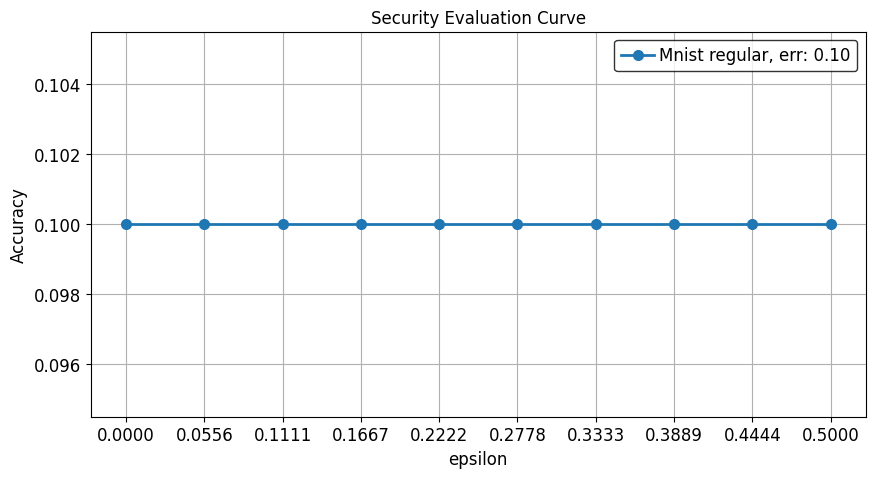

In [139]:
%matplotlib inline
from secml.figure import CFigure
fig = CFigure(height=5, width=10)
fig.sp.plot_sec_eval(sec_eval.sec_eval_data, marker='o', label="Mnist regular", show_average=True)
fig.show()

In [143]:
y_pred, _, dataMal,_ = attack.run(ts.X, ts.Y)  # Retorna la imagen perturbada

In [144]:
y_pred.shape

(20,)

In [147]:
for i in range(y_pred.shape[0]):
    print(f"{ts.Y[i].item()}-{y_pred[i].item()}")

7-0
2-0
1-0
0-0
4-0
1-0
4-0
9-0
5-0
9-0
0-0
6-0
5-0
7-0
3-0
6-0
3-0
2-0
8-0
8-0
